In [1]:
from goose3 import Goose
import pandas as pd
import requests
import bs4 as bfs
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
from textblob import TextBlob
import csv
import numpy as np

In [2]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import requests
from urllib.request import urlopen
import bs4 as bs
import urllib.request
import re

c:\python38\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
df = pd.read_excel('Input.xlsx',index_col=0)
df.head()

,URL
URL_ID,
37,https://insights.blackcoffer.com/ai-in-healthc...
38,https://insights.blackcoffer.com/what-if-the-c...
39,https://insights.blackcoffer.com/what-jobs-wil...
40,https://insights.blackcoffer.com/will-machine-...
41,https://insights.blackcoffer.com/will-ai-repla...


In [4]:
li = [url for url in df['URL']]
li[0]

'https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/'

In [5]:
goose=Goose()

In [6]:
article=goose.extract(li[0])

In [7]:
senta = article._cleaned_text
senta

'“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.\n\nAfter the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns 

In [8]:
# Converting text to sentences i.e. sentence tokenization
from nltk.tokenize import sent_tokenize
tokenized_senta = sent_tokenize(senta)
print(tokenized_senta)


['“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war.', 'Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak.', 'When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population.', 'This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities.', 'For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.', 'After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic.', 'It was quick to realise AI’s ability to analyse large chunks of data could help in det

In [9]:
def get_only_text(url):
    page = urlopen(url)
    soup = bs.BeautifulSoup(page,"lxml")
    text = ''.join(map(lambda p: p.text, soup.find_all('p')))
    return soup.title.text, text

In [10]:
url = "https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/"
text = get_only_text(url)
print(text)

('AI in healthcare to Improve Patient Outcomes | Blackcoffer Insights', 'Ranking customer behaviours for business strategyAlgorithmic trading for multiple commodities markets, like Forex, Metals, Energy, etc.Trading Bot for FOREXPython model for the analysis of sector-specific stock ETFs for investment purposesPlaystore & Appstore to Google Analytics (GA) or Firebase to Google Data Studio Mobile App KPI DashboardGoogle Local Service Ads LSA API To Google BigQuery to Google Data StudioAI Conversational Bot using RASARecommendation System ArchitectureRise of telemedicine and its Impact on Livelihood by 2040Rise of e-health and its impact on humans by the year 2030Rise of e-health and its impact on humans by the year 2030Rise of telemedicine and its Impact on Livelihood by 2040AI/ML and Predictive ModelingSolution for Contact Centre ProblemsHow to Setup Custom Domain for Google App Engine Application?Code Review ChecklistIntroduction“If anything kills over 10 million people in the next fe

In [11]:
# Converting text to sentences i.e. sentence tokenization
from nltk.tokenize import sent_tokenize
tokenized_sent_text = sent_tokenize(str(text))
print(tokenized_sent_text)

["('AI in healthcare to Improve Patient Outcomes | Blackcoffer Insights', 'Ranking customer behaviours for business strategyAlgorithmic trading for multiple commodities markets, like Forex, Metals, Energy, etc.Trading Bot for FOREXPython model for the analysis of sector-specific stock ETFs for investment purposesPlaystore & Appstore to Google Analytics (GA) or Firebase to Google Data Studio Mobile App KPI DashboardGoogle Local Service Ads LSA API To Google BigQuery to Google Data StudioAI Conversational Bot using RASARecommendation System ArchitectureRise of telemedicine and its Impact on Livelihood by 2040Rise of e-health and its impact on humans by the year 2030Rise of e-health and its impact on humans by the year 2030Rise of telemedicine and its Impact on Livelihood by 2040AI/ML and Predictive ModelingSolution for Contact Centre ProblemsHow to Setup Custom Domain for Google App Engine Application?Code Review ChecklistIntroduction“If anything kills over 10 million people in the next 

In [12]:
len(tokenized_sent_text)

51

In [13]:
# Removing Square Brackets amd Extra Spaces
text = re.sub(r'\[[0-9]*\]',' ', str(text))
text = re.sub(r'\s+', ' ', str(text))


# Removing Square Brackets amd Extra Spaces
text = re.sub('[^a-zA-Z]',' ', str(text))
text = re.sub(r'\s+', ' ', str(text))


In [14]:
text

' AI in healthcare to Improve Patient Outcomes Blackcoffer Insights Ranking customer behaviours for business strategyAlgorithmic trading for multiple commodities markets like Forex Metals Energy etc Trading Bot for FOREXPython model for the analysis of sector specific stock ETFs for investment purposesPlaystore Appstore to Google Analytics GA or Firebase to Google Data Studio Mobile App KPI DashboardGoogle Local Service Ads LSA API To Google BigQuery to Google Data StudioAI Conversational Bot using RASARecommendation System ArchitectureRise of telemedicine and its Impact on Livelihood by Rise of e health and its impact on humans by the year Rise of e health and its impact on humans by the year Rise of telemedicine and its Impact on Livelihood by AI ML and Predictive ModelingSolution for Contact Centre ProblemsHow to Setup Custom Domain for Google App Engine Application Code Review ChecklistIntroduction If anything kills over million people in the next few decades it will be a highly in

# Converting text to sentences i.e. sentence tokenization

In [15]:
# Converting text to sentences i.e. sentence tokenization
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(text)
print(tokenized_sent)

[' AI in healthcare to Improve Patient Outcomes Blackcoffer Insights Ranking customer behaviours for business strategyAlgorithmic trading for multiple commodities markets like Forex Metals Energy etc Trading Bot for FOREXPython model for the analysis of sector specific stock ETFs for investment purposesPlaystore Appstore to Google Analytics GA or Firebase to Google Data Studio Mobile App KPI DashboardGoogle Local Service Ads LSA API To Google BigQuery to Google Data StudioAI Conversational Bot using RASARecommendation System ArchitectureRise of telemedicine and its Impact on Livelihood by Rise of e health and its impact on humans by the year Rise of e health and its impact on humans by the year Rise of telemedicine and its Impact on Livelihood by AI ML and Predictive ModelingSolution for Contact Centre ProblemsHow to Setup Custom Domain for Google App Engine Application Code Review ChecklistIntroduction If anything kills over million people in the next few decades it will be a highly i

In [16]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(text)
print(tokenized_word)

['AI', 'in', 'healthcare', 'to', 'Improve', 'Patient', 'Outcomes', 'Blackcoffer', 'Insights', 'Ranking', 'customer', 'behaviours', 'for', 'business', 'strategyAlgorithmic', 'trading', 'for', 'multiple', 'commodities', 'markets', 'like', 'Forex', 'Metals', 'Energy', 'etc', 'Trading', 'Bot', 'for', 'FOREXPython', 'model', 'for', 'the', 'analysis', 'of', 'sector', 'specific', 'stock', 'ETFs', 'for', 'investment', 'purposesPlaystore', 'Appstore', 'to', 'Google', 'Analytics', 'GA', 'or', 'Firebase', 'to', 'Google', 'Data', 'Studio', 'Mobile', 'App', 'KPI', 'DashboardGoogle', 'Local', 'Service', 'Ads', 'LSA', 'API', 'To', 'Google', 'BigQuery', 'to', 'Google', 'Data', 'StudioAI', 'Conversational', 'Bot', 'using', 'RASARecommendation', 'System', 'ArchitectureRise', 'of', 'telemedicine', 'and', 'its', 'Impact', 'on', 'Livelihood', 'by', 'Rise', 'of', 'e', 'health', 'and', 'its', 'impact', 'on', 'humans', 'by', 'the', 'year', 'Rise', 'of', 'e', 'health', 'and', 'its', 'impact', 'on', 'humans', '

In [17]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 911 samples and 1989 outcomes>


In [18]:
fdist.most_common(5)

[('the', 79), ('and', 77), ('to', 57), ('of', 44), ('in', 40)]

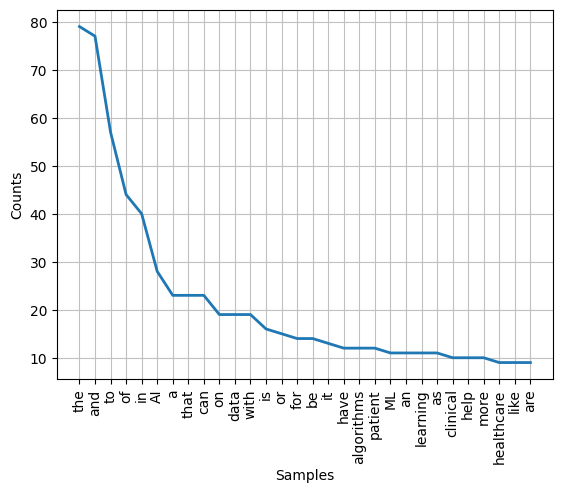

In [19]:
#Frequency distribution plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# Stopwords

In [20]:
# stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'him', 'their', "didn't", 'does', 'should', 'to', 'into', "don't", 'out', 'other', 'own', 'doesn', 'up', 'has', 'from', 'are', "it's", 'there', "you'll", 'while', 'd', 'hasn', 'further', 'who', 'didn', 'he', 'wouldn', 'my', 'why', "weren't", "wouldn't", 'for', 'being', 'do', 'here', 'below', 'yourselves', 'haven', 'as', 've', 're', 'most', "mightn't", 'in', 'or', 'mustn', 'any', 'above', 'it', 'until', 'don', 'before', "haven't", 'they', 'whom', 'so', 'couldn', 'an', 'ourselves', 'if', 'such', 'shouldn', 'of', 'she', 'just', 'doing', 'aren', 'a', 'be', 'each', 'ma', 'your', 'no', 'nor', 'during', "shouldn't", 'have', 'against', 'hadn', 'yours', "wasn't", 'by', 'when', 'both', 'o', 'i', 'this', "needn't", 'we', 'weren', 'myself', 'won', 'under', 'off', 'these', 'them', 'himself', 'through', 'isn', 'not', 'which', 'themselves', "should've", 'very', 'but', 'once', 'will', "doesn't", 'ours', 'where', 'been', "that'll", 'her', 'about', 'than', 'ain', 'll', 'at', 'and', 'is', 'over', 'am', 

In [21]:
# to remove stopwords
filtered_word = []
Word_Count=0
sum_of_word_of_all_length=0
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)
        Word_Count+=1
        sum_of_word_of_all_length+=len(w)
print("Tokenized Sentence:", tokenized_word)
print("Filtered Sentence:", filtered_word)

Tokenized Sentence: ['AI', 'in', 'healthcare', 'to', 'Improve', 'Patient', 'Outcomes', 'Blackcoffer', 'Insights', 'Ranking', 'customer', 'behaviours', 'for', 'business', 'strategyAlgorithmic', 'trading', 'for', 'multiple', 'commodities', 'markets', 'like', 'Forex', 'Metals', 'Energy', 'etc', 'Trading', 'Bot', 'for', 'FOREXPython', 'model', 'for', 'the', 'analysis', 'of', 'sector', 'specific', 'stock', 'ETFs', 'for', 'investment', 'purposesPlaystore', 'Appstore', 'to', 'Google', 'Analytics', 'GA', 'or', 'Firebase', 'to', 'Google', 'Data', 'Studio', 'Mobile', 'App', 'KPI', 'DashboardGoogle', 'Local', 'Service', 'Ads', 'LSA', 'API', 'To', 'Google', 'BigQuery', 'to', 'Google', 'Data', 'StudioAI', 'Conversational', 'Bot', 'using', 'RASARecommendation', 'System', 'ArchitectureRise', 'of', 'telemedicine', 'and', 'its', 'Impact', 'on', 'Livelihood', 'by', 'Rise', 'of', 'e', 'health', 'and', 'its', 'impact', 'on', 'humans', 'by', 'the', 'year', 'Rise', 'of', 'e', 'health', 'and', 'its', 'impact

In [22]:
filtered_word

['AI',
 'healthcare',
 'Improve',
 'Patient',
 'Outcomes',
 'Blackcoffer',
 'Insights',
 'Ranking',
 'customer',
 'behaviours',
 'business',
 'strategyAlgorithmic',
 'trading',
 'multiple',
 'commodities',
 'markets',
 'like',
 'Forex',
 'Metals',
 'Energy',
 'etc',
 'Trading',
 'Bot',
 'FOREXPython',
 'model',
 'analysis',
 'sector',
 'specific',
 'stock',
 'ETFs',
 'investment',
 'purposesPlaystore',
 'Appstore',
 'Google',
 'Analytics',
 'GA',
 'Firebase',
 'Google',
 'Data',
 'Studio',
 'Mobile',
 'App',
 'KPI',
 'DashboardGoogle',
 'Local',
 'Service',
 'Ads',
 'LSA',
 'API',
 'To',
 'Google',
 'BigQuery',
 'Google',
 'Data',
 'StudioAI',
 'Conversational',
 'Bot',
 'using',
 'RASARecommendation',
 'System',
 'ArchitectureRise',
 'telemedicine',
 'Impact',
 'Livelihood',
 'Rise',
 'e',
 'health',
 'impact',
 'humans',
 'year',
 'Rise',
 'e',
 'health',
 'impact',
 'humans',
 'year',
 'Rise',
 'telemedicine',
 'Impact',
 'Livelihood',
 'AI',
 'ML',
 'Predictive',
 'ModelingSolution

In [23]:
# WORD_COUNT
Word_Count

1327

In [24]:
# Average length of words
avg = sum_of_word_of_all_length/Word_Count
print(avg)

6.969103240391862


In [25]:
Personal_pronouns_list= ["I","we","my","ours","us"]

In [26]:
#Count_of_Personal_pronouns
Count_of_Personal_pronouns=0

for word in filtered_word:
    if word in Personal_pronouns_list:
        print(word)
        Count_of_Personal_pronouns+=1
print("Personal_pronouns count: ",Count_of_Personal_pronouns)

us
us
Personal_pronouns count:  2


In [27]:
# to remove stopwords
filtered_sent = []
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:", tokenized_sent)
print("Filtered Sentence:", filtered_sent)

Tokenized Sentence: [' AI in healthcare to Improve Patient Outcomes Blackcoffer Insights Ranking customer behaviours for business strategyAlgorithmic trading for multiple commodities markets like Forex Metals Energy etc Trading Bot for FOREXPython model for the analysis of sector specific stock ETFs for investment purposesPlaystore Appstore to Google Analytics GA or Firebase to Google Data Studio Mobile App KPI DashboardGoogle Local Service Ads LSA API To Google BigQuery to Google Data StudioAI Conversational Bot using RASARecommendation System ArchitectureRise of telemedicine and its Impact on Livelihood by Rise of e health and its impact on humans by the year Rise of e health and its impact on humans by the year Rise of telemedicine and its Impact on Livelihood by AI ML and Predictive ModelingSolution for Contact Centre ProblemsHow to Setup Custom Domain for Google App Engine Application Code Review ChecklistIntroduction If anything kills over million people in the next few decades i

In [28]:
print("Filtered Sentence:", filtered_sent)

Filtered Sentence: [' AI in healthcare to Improve Patient Outcomes Blackcoffer Insights Ranking customer behaviours for business strategyAlgorithmic trading for multiple commodities markets like Forex Metals Energy etc Trading Bot for FOREXPython model for the analysis of sector specific stock ETFs for investment purposesPlaystore Appstore to Google Analytics GA or Firebase to Google Data Studio Mobile App KPI DashboardGoogle Local Service Ads LSA API To Google BigQuery to Google Data StudioAI Conversational Bot using RASARecommendation System ArchitectureRise of telemedicine and its Impact on Livelihood by Rise of e health and its impact on humans by the year Rise of e health and its impact on humans by the year Rise of telemedicine and its Impact on Livelihood by AI ML and Predictive ModelingSolution for Contact Centre ProblemsHow to Setup Custom Domain for Google App Engine Application Code Review ChecklistIntroduction If anything kills over million people in the next few decades it

In [29]:
# POS TAGGING
# The primary targetof parts-of-speech (POS) tagging is to identify 
# the grammatical group of a given word. whether it is 
# a NOUN, PRONOUN, ADJCECTIVE, , VERB, ADVERBS, etc.
# based on the context. POS tagging looks for 
# relatioships within the ssentence and assugins a corresponding tag to the word.

In [30]:
import nltk
tokens = nltk.word_tokenize(text)
print(tokens)

['AI', 'in', 'healthcare', 'to', 'Improve', 'Patient', 'Outcomes', 'Blackcoffer', 'Insights', 'Ranking', 'customer', 'behaviours', 'for', 'business', 'strategyAlgorithmic', 'trading', 'for', 'multiple', 'commodities', 'markets', 'like', 'Forex', 'Metals', 'Energy', 'etc', 'Trading', 'Bot', 'for', 'FOREXPython', 'model', 'for', 'the', 'analysis', 'of', 'sector', 'specific', 'stock', 'ETFs', 'for', 'investment', 'purposesPlaystore', 'Appstore', 'to', 'Google', 'Analytics', 'GA', 'or', 'Firebase', 'to', 'Google', 'Data', 'Studio', 'Mobile', 'App', 'KPI', 'DashboardGoogle', 'Local', 'Service', 'Ads', 'LSA', 'API', 'To', 'Google', 'BigQuery', 'to', 'Google', 'Data', 'StudioAI', 'Conversational', 'Bot', 'using', 'RASARecommendation', 'System', 'ArchitectureRise', 'of', 'telemedicine', 'and', 'its', 'Impact', 'on', 'Livelihood', 'by', 'Rise', 'of', 'e', 'health', 'and', 'its', 'impact', 'on', 'humans', 'by', 'the', 'year', 'Rise', 'of', 'e', 'health', 'and', 'its', 'impact', 'on', 'humans', '

In [31]:
nltk.pos_tag(tokens)

[('AI', 'NNP'),
 ('in', 'IN'),
 ('healthcare', 'NN'),
 ('to', 'TO'),
 ('Improve', 'VB'),
 ('Patient', 'NNP'),
 ('Outcomes', 'NNP'),
 ('Blackcoffer', 'NNP'),
 ('Insights', 'NNP'),
 ('Ranking', 'NNP'),
 ('customer', 'NN'),
 ('behaviours', 'NN'),
 ('for', 'IN'),
 ('business', 'NN'),
 ('strategyAlgorithmic', 'JJ'),
 ('trading', 'NN'),
 ('for', 'IN'),
 ('multiple', 'JJ'),
 ('commodities', 'NNS'),
 ('markets', 'NNS'),
 ('like', 'IN'),
 ('Forex', 'NNP'),
 ('Metals', 'NNP'),
 ('Energy', 'NNP'),
 ('etc', 'FW'),
 ('Trading', 'NNP'),
 ('Bot', 'NNP'),
 ('for', 'IN'),
 ('FOREXPython', 'NNP'),
 ('model', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('analysis', 'NN'),
 ('of', 'IN'),
 ('sector', 'NN'),
 ('specific', 'JJ'),
 ('stock', 'NN'),
 ('ETFs', 'NNP'),
 ('for', 'IN'),
 ('investment', 'NN'),
 ('purposesPlaystore', 'NN'),
 ('Appstore', 'NNP'),
 ('to', 'TO'),
 ('Google', 'NNP'),
 ('Analytics', 'NNP'),
 ('GA', 'NNP'),
 ('or', 'CC'),
 ('Firebase', 'NNP'),
 ('to', 'TO'),
 ('Google', 'NNP'),
 ('Data', 'NNP

In [32]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [33]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [34]:
#Find weighted frequency of occurence

stop_words = nltk.corpus.stopwords.words('english')
word_frequencies = {}
Wcount=0
for word in nltk.word_tokenize(str(text)):
    if word not in word_frequencies.keys():
        word_frequencies[word] = 1
    else:
        word_frequencies[word] +=1
        
    Wcount+=1
        

In [35]:
# Wcount

# WORD COUNT

In [36]:
word_frequencies

{'AI': 28,
 'in': 40,
 'healthcare': 9,
 'to': 57,
 'Improve': 1,
 'Patient': 2,
 'Outcomes': 1,
 'Blackcoffer': 2,
 'Insights': 1,
 'Ranking': 1,
 'customer': 1,
 'behaviours': 2,
 'for': 14,
 'business': 1,
 'strategyAlgorithmic': 1,
 'trading': 1,
 'multiple': 2,
 'commodities': 1,
 'markets': 1,
 'like': 9,
 'Forex': 1,
 'Metals': 1,
 'Energy': 1,
 'etc': 5,
 'Trading': 1,
 'Bot': 2,
 'FOREXPython': 1,
 'model': 3,
 'the': 79,
 'analysis': 4,
 'of': 44,
 'sector': 3,
 'specific': 2,
 'stock': 1,
 'ETFs': 1,
 'investment': 1,
 'purposesPlaystore': 1,
 'Appstore': 1,
 'Google': 6,
 'Analytics': 1,
 'GA': 1,
 'or': 15,
 'Firebase': 1,
 'Data': 2,
 'Studio': 1,
 'Mobile': 1,
 'App': 2,
 'KPI': 1,
 'DashboardGoogle': 1,
 'Local': 1,
 'Service': 1,
 'Ads': 1,
 'LSA': 1,
 'API': 1,
 'To': 1,
 'BigQuery': 1,
 'StudioAI': 1,
 'Conversational': 1,
 'using': 3,
 'RASARecommendation': 1,
 'System': 1,
 'ArchitectureRise': 1,
 'telemedicine': 2,
 'and': 77,
 'its': 6,
 'Impact': 2,
 'on': 19,
 

In [37]:
# HOW TO CALCULATE THE WEIGHTED FREQUENCY OF EACH WORD

maximum_frequency = max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word]= (word_frequencies[word]/maximum_frequency)

In [38]:
text

' AI in healthcare to Improve Patient Outcomes Blackcoffer Insights Ranking customer behaviours for business strategyAlgorithmic trading for multiple commodities markets like Forex Metals Energy etc Trading Bot for FOREXPython model for the analysis of sector specific stock ETFs for investment purposesPlaystore Appstore to Google Analytics GA or Firebase to Google Data Studio Mobile App KPI DashboardGoogle Local Service Ads LSA API To Google BigQuery to Google Data StudioAI Conversational Bot using RASARecommendation System ArchitectureRise of telemedicine and its Impact on Livelihood by Rise of e health and its impact on humans by the year Rise of e health and its impact on humans by the year Rise of telemedicine and its Impact on Livelihood by AI ML and Predictive ModelingSolution for Contact Centre ProblemsHow to Setup Custom Domain for Google App Engine Application Code Review ChecklistIntroduction If anything kills over million people in the next few decades it will be a highly in

In [39]:
sentence_list = nltk.sent_tokenize(text)
sentence_list

[' AI in healthcare to Improve Patient Outcomes Blackcoffer Insights Ranking customer behaviours for business strategyAlgorithmic trading for multiple commodities markets like Forex Metals Energy etc Trading Bot for FOREXPython model for the analysis of sector specific stock ETFs for investment purposesPlaystore Appstore to Google Analytics GA or Firebase to Google Data Studio Mobile App KPI DashboardGoogle Local Service Ads LSA API To Google BigQuery to Google Data StudioAI Conversational Bot using RASARecommendation System ArchitectureRise of telemedicine and its Impact on Livelihood by Rise of e health and its impact on humans by the year Rise of e health and its impact on humans by the year Rise of telemedicine and its Impact on Livelihood by AI ML and Predictive ModelingSolution for Contact Centre ProblemsHow to Setup Custom Domain for Google App Engine Application Code Review ChecklistIntroduction If anything kills over million people in the next few decades it will be a highly i

In [40]:
sentence_scores = {}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' '))<30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]         

In [41]:
sentence_scores

{}

In [42]:
# find 10 topmost sentence having highest sentence scores

import heapq
summary_sentences = heapq.nlargest(10,sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)
print(summary)

In [43]:
text

' AI in healthcare to Improve Patient Outcomes Blackcoffer Insights Ranking customer behaviours for business strategyAlgorithmic trading for multiple commodities markets like Forex Metals Energy etc Trading Bot for FOREXPython model for the analysis of sector specific stock ETFs for investment purposesPlaystore Appstore to Google Analytics GA or Firebase to Google Data Studio Mobile App KPI DashboardGoogle Local Service Ads LSA API To Google BigQuery to Google Data StudioAI Conversational Bot using RASARecommendation System ArchitectureRise of telemedicine and its Impact on Livelihood by Rise of e health and its impact on humans by the year Rise of e health and its impact on humans by the year Rise of telemedicine and its Impact on Livelihood by AI ML and Predictive ModelingSolution for Contact Centre ProblemsHow to Setup Custom Domain for Google App Engine Application Code Review ChecklistIntroduction If anything kills over million people in the next few decades it will be a highly in

In [44]:
tokenized_sent

[' AI in healthcare to Improve Patient Outcomes Blackcoffer Insights Ranking customer behaviours for business strategyAlgorithmic trading for multiple commodities markets like Forex Metals Energy etc Trading Bot for FOREXPython model for the analysis of sector specific stock ETFs for investment purposesPlaystore Appstore to Google Analytics GA or Firebase to Google Data Studio Mobile App KPI DashboardGoogle Local Service Ads LSA API To Google BigQuery to Google Data StudioAI Conversational Bot using RASARecommendation System ArchitectureRise of telemedicine and its Impact on Livelihood by Rise of e health and its impact on humans by the year Rise of e health and its impact on humans by the year Rise of telemedicine and its Impact on Livelihood by AI ML and Predictive ModelingSolution for Contact Centre ProblemsHow to Setup Custom Domain for Google App Engine Application Code Review ChecklistIntroduction If anything kills over million people in the next few decades it will be a highly i

# REMOVING STOP WORDS

In [45]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
allstopwords = stopwords.words('english')
tokenized_text = word_tokenize(text)
filtered_text = [word for word in tokenized_text if not word in allstopwords]
print(filtered_text)

['AI', 'healthcare', 'Improve', 'Patient', 'Outcomes', 'Blackcoffer', 'Insights', 'Ranking', 'customer', 'behaviours', 'business', 'strategyAlgorithmic', 'trading', 'multiple', 'commodities', 'markets', 'like', 'Forex', 'Metals', 'Energy', 'etc', 'Trading', 'Bot', 'FOREXPython', 'model', 'analysis', 'sector', 'specific', 'stock', 'ETFs', 'investment', 'purposesPlaystore', 'Appstore', 'Google', 'Analytics', 'GA', 'Firebase', 'Google', 'Data', 'Studio', 'Mobile', 'App', 'KPI', 'DashboardGoogle', 'Local', 'Service', 'Ads', 'LSA', 'API', 'To', 'Google', 'BigQuery', 'Google', 'Data', 'StudioAI', 'Conversational', 'Bot', 'using', 'RASARecommendation', 'System', 'ArchitectureRise', 'telemedicine', 'Impact', 'Livelihood', 'Rise', 'e', 'health', 'impact', 'humans', 'year', 'Rise', 'e', 'health', 'impact', 'humans', 'year', 'Rise', 'telemedicine', 'Impact', 'Livelihood', 'AI', 'ML', 'Predictive', 'ModelingSolution', 'Contact', 'Centre', 'ProblemsHow', 'Setup', 'Custom', 'Domain', 'Google', 'App'

In [46]:
filtered_sentence = (" ").join(filtered_text)
print(filtered_sentence)

AI healthcare Improve Patient Outcomes Blackcoffer Insights Ranking customer behaviours business strategyAlgorithmic trading multiple commodities markets like Forex Metals Energy etc Trading Bot FOREXPython model analysis sector specific stock ETFs investment purposesPlaystore Appstore Google Analytics GA Firebase Google Data Studio Mobile App KPI DashboardGoogle Local Service Ads LSA API To Google BigQuery Google Data StudioAI Conversational Bot using RASARecommendation System ArchitectureRise telemedicine Impact Livelihood Rise e health impact humans year Rise e health impact humans year Rise telemedicine Impact Livelihood AI ML Predictive ModelingSolution Contact Centre ProblemsHow Setup Custom Domain Google App Engine Application Code Review ChecklistIntroduction If anything kills million people next decades highly infectious virus rather war Not missiles microbes Bill Gates remarks TED conference right world avoided Ebola outbreak When new unprecedented invisible virus hit us met 

In [47]:
print(len(stopwords.words('english')))

179


In [48]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
with open('positive-words.txt','r') as file:
    for line in file:
        for word in line.split():
            print(word)

a+
abound
abounds
abundance
abundant
accessable
accessible
acclaim
acclaimed
acclamation
accolade
accolades
accommodative
accomodative
accomplish
accomplished
accomplishment
accomplishments
accurate
accurately
achievable
achievement
achievements
achievible
acumen
adaptable
adaptive
adequate
adjustable
admirable
admirably
admiration
admire
admirer
admiring
admiringly
adorable
adore
adored
adorer
adoring
adoringly
adroit
adroitly
adulate
adulation
adulatory
advanced
advantage
advantageous
advantageously
advantages
adventuresome
adventurous
advocate
advocated
advocates
affability
affable
affably
affectation
affection
affectionate
affinity
affirm
affirmation
affirmative
affluence
affluent
afford
affordable
affordably
afordable
agile
agilely
agility
agreeable
agreeableness
agreeably
all-around
alluring
alluringly
altruistic
altruistically
amaze
amazed
amazement
amazes
amazing
amazingly
ambitious
ambitiously
ameliorate
amenable
amenity
amiability
amiabily
amiable
amicability
amicable
amicabl

In [50]:
Pcount=0
with open('positive-words.txt','r') as file:
    for line in file:
        for Pword in line.split():
            if Pword in filtered_text:
                #print(Pword)
                Pcount+=1    
print("Total Positive score:",Pcount)

Total Positive score: 50


In [51]:
Ncount=0
with open('negative-words.txt','r') as file:
    for line in file:
        for Nword in line.split():
            if Nword in filtered_text:
                Ncount+=-1     
                #print(Nword)
print("Total Negative score: ",abs(Ncount))


Total Negative score:  27


In [52]:
Polarity_Score = (Pcount - Ncount)/ ((Pcount + Ncount) + 0.000001)
print("Polarity score is: ", Polarity_Score)

Polarity score is:  3.347825941398872


In [53]:
Subjectivity_Score = (Pcount + Ncount)/ (Word_Count + 0.000001)
print("Subjectivity score is: ", Subjectivity_Score)

Subjectivity score is:  0.01733232854760186


In [54]:
# to remove stopwords
filtered_senta = []
for w in tokenized_senta:
    if w not in stop_words:
        filtered_senta.append(w)
#print("Tokenized Sentence:", tokenized_senta)
print("Filtered Sentence:", filtered_senta)

Filtered Sentence: ['“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war.', 'Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak.', 'When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population.', 'This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities.', 'For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.', 'After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic.', 'It was quick to realise AI’s ability to analyse large chunks of dat

In [55]:
from nltk.tokenize import sent_tokenize
all_sent = sent_tokenize(str(filtered_senta))
print(all_sent)
total_number_of_sentences = len(all_sent)
print("\nNumber of sentences: ", total_number_of_sentences)

["['“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war.", "', 'Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak.", "', 'When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population.", "', 'This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities.", "', 'For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.", "', 'After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic.", "', 'It was quick to realise AI’s ability to analyse large chunks

In [56]:
type(Word_Count)

int

In [57]:
type(total_number_of_sentences)

int

In [58]:
Average_Sentence_Length = Word_Count/total_number_of_sentences
print("Average Sentence Length is : ", Average_Sentence_Length)

Average Sentence Length is :  17.69333333333333


In [59]:
Average_Number_of_Words_Per_Sentence = Word_Count / total_number_of_sentences
print("Average Number of Words Per Sentence is :", Average_Number_of_Words_Per_Sentence)

Average Number of Words Per Sentence is : 17.69333333333333


In [60]:
count=0
sylabblewords=0
final=0
sylabble_count=0
complex_word_count=0
for words in filtered_senta:
    for i in range(len(words)):
      if(words[i]=='a' or words[i]=='e' or words[i] =='i' or words[i] == 'o' or words[i] == 'u'):
           count+=1
      if (i==len(words)-2 and (words[i]=='e' and words[i+1]=='d')):
        count-=1;
      elif(i==len(words)-2 and (words[i]=='e' and words[i]=='s')):
        count-=1; 
    sylabblewords+=count    
    if(count>2):
        final+=1
    sylabble_count = sylabblewords 
    complex_word_count = final

In [61]:
complex_word_count

75

In [62]:
sylabble_count

146543

In [63]:
syllable_count_per_word = sylabble_count / Word_Count
print("syllable_count_per_word is :", syllable_count_per_word)

syllable_count_per_word is : 110.4318010550113


In [64]:
Percentage_of_Complex_words = complex_word_count / Word_Count
print("Percentage_of_Complex is : ", Percentage_of_Complex_words)

Percentage_of_Complex is :  0.05651846269781462


In [65]:
Fog_Index = 0.4 * (Average_Sentence_Length + Percentage_of_Complex_words)
print(" Fog Index is:  ",Fog_Index )

 Fog Index is:   7.0999407184124586
